In [1]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

theta = 0.7  # Can be changed to any value between 0 and 1

qc = QuantumCircuit(2, 1)

# Prepare eigenvector, which is the |1> state

qc.x(1)
qc.barrier()

# Implement the estimation procedure
qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

# Perform the final measurement
qc.measure(0, 0)

# Draw the circuit
display(qc.draw())

░ ┌───┐          ┌───┐ ░ ┌─┐
q_0: ──────░─┤ H ├─■────────┤ H ├─░─┤M├
     ┌───┐ ░ └───┘ │P(7π/5) └───┘ ░ └╥┘
q_1: ┤ X ├─░───────■──────────────░──╫─
     └───┘ ░                      ░  ║ 
c: 1/════════════════════════════════╩═
                                     0

In [2]:
from qiskit.primitives import Sampler

display(Sampler().run(qc).result().quasi_dists[0])

C:\Users\Plasc\AppData\Local\Temp\ipykernel_14784\1644269935.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  display(Sampler().run(qc).result().quasi_dists[0])


{0: np.float64(0.345491502812526), 1: np.float64(0.654508497187474)}

In [3]:
from math import pi
from qiskit import QuantumCircuit

theta = 0.7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# The initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# The controlled unitary gates
qc.cp(2 * pi * theta, 0, 2)
qc.cp(2 * pi * (2 * theta), 1, 2)
qc.barrier()

# An implementation of the inverse of the two-qubit QFT
qc.swap(0, 1)
qc.h(0)
qc.cp(-pi / 2, 0, 1)
qc.h(1)
qc.barrier()

# And finally the measurements
qc.measure([0, 1], [0, 1])
display(qc.draw())

░ ┌───┐ ░                       ░    ┌───┐                ░ ┌─┐   
q_0: ──────░─┤ H ├─░──■────────────────────░──X─┤ H ├─■──────────────░─┤M├───
           ░ ├───┤ ░  │                    ░  │ └───┘ │P(-π/2) ┌───┐ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├─░──┼─────────■──────────░──X───────■────────┤ H ├─░──╫─┤M├
     ┌───┐ ░ └───┘ ░  │P(7π/5)  │P(14π/5)  ░                   └───┘ ░  ║ └╥┘
q_2: ┤ X ├─░───────░──■─────────■──────────░─────────────────────────░──╫──╫─
     └───┘ ░       ░                       ░                         ░  ║  ║ 
c: 2/═══════════════════════════════════════════════════════════════════╩══╩═
                                                                        0  1

C:\Users\Plasc\AppData\Local\Temp\ipykernel_14784\3145071669.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  result = Sampler().run(qc).result()


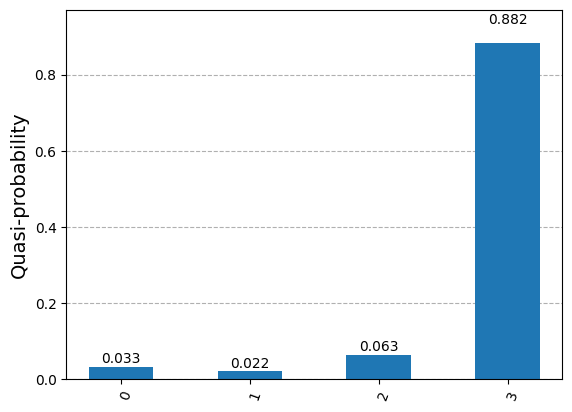

In [4]:
from qiskit.visualization import plot_histogram

result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [ ]:
# qc.barrier()
# qc.cx(0, 4)
# qc.ccx(0, 3, 2)
# qc.ch(0, 3)
# qc.barrier()

# # M_1
# qc.barrier()
# qc.cx(1, 4)
# qc.ccx(1, 3, 2)
# qc.ch(1, 3)
# qc.barrier()

# # M_2
# qc.barrier()
# qc.cx(1, 4)
# qc.ccx(1, 3, 2)
# qc.ch(1, 3)
# qc.barrier()